In [1]:
from Stocker.stocker import Stocker
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime

### References ###
* [超簡單用Python預測股價](https://www.finlab.tw/%E8%B6%85%E7%B0%A1%E5%96%AE-Machine-Learning-%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9/)

In [2]:
start = datetime(2005, 1, 1)
end = datetime(2017, 1, 10)

# TSM: 台積電
# 2317.TW: 鴻海
df = web.DataReader('TSM', 'yahoo', start) 
df = df[['Close']]
df.head()

,Close
Date,
2004-12-31,7.811152
2005-01-03,7.728349
2005-01-04,7.433935
2005-01-05,7.286729
2005-01-06,7.222326


In [3]:
### 讀入series
# df = pd.read_csv('Stocker/price.csv', index_col='date', parse_dates=['date'])
price = df.squeeze()
price.tail()

Date
2019-12-16    58.540001
2019-12-17    59.230000
2019-12-18    59.099998
2019-12-19    57.959999
2019-12-20    57.930000
Name: Close, dtype: float64

In [4]:
tsmc = Stocker(price)

the stock Stocker Initialized. Data covers 2004-12-31 00:00:00 to 2019-12-20 00:00:00.


/Users/hrjheng/Desktop/Playground/Stocks/Stocker/stocker.py:46: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/Users/hrjheng/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:961: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/Users/hrjheng/Desktop/Playground/Stocks/Stocker/stocker.py:49: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



/Users/hrjheng/Desktop/Playground/Stocks/Stocker/stocker.py:436: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



Predicted Price on 2019-12-27 00:00:00 = $56.55


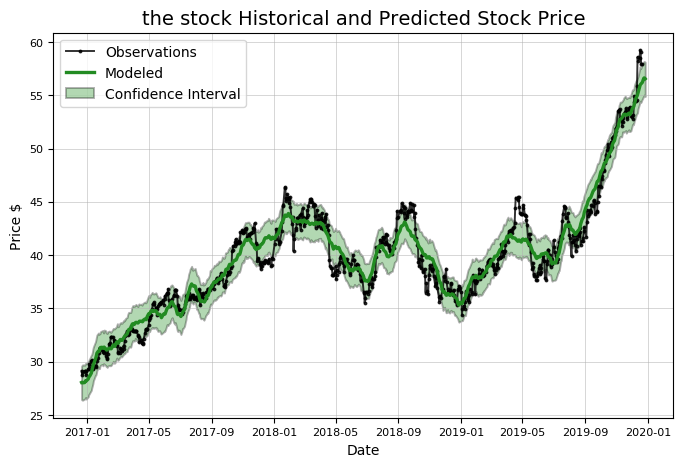

In [5]:
model, model_data = tsmc.create_prophet_model(days=7)

/Users/hrjheng/Desktop/Playground/Stocks/Stocker/stocker.py:517: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/Users/hrjheng/Desktop/Playground/Stocks/Stocker/stocker.py:518: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/Users/hrjheng/Desktop/Playground/Stocks/Stocker/stocker.py:529: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/Users/hrjheng/Desktop/Playground/Stocks/Stocker/stocker.py:530: FutureWarning:


.ix is deprecated. Pl


Prediction Range: 2018-12-20 00:00:00 to 2019-12-20 00:00:00.

Predicted price on 2019-12-19 00:00:00 = $30.94.
Actual price on    2019-12-19 00:00:00 = $57.96.

Average Absolute Error on Training Data = $0.95.
Average Absolute Error on Testing  Data = $8.39.

When the model predicted an increase, the price increased 56.19% of the time.
When the model predicted a  decrease, the price decreased  41.78% of the time.

The actual value was within the 80% confidence interval 12.30% of the time.


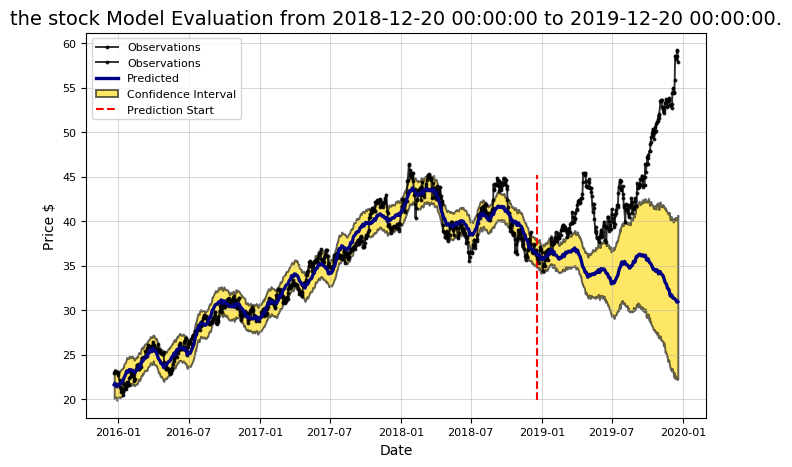

In [6]:
tsmc.evaluate_prediction()

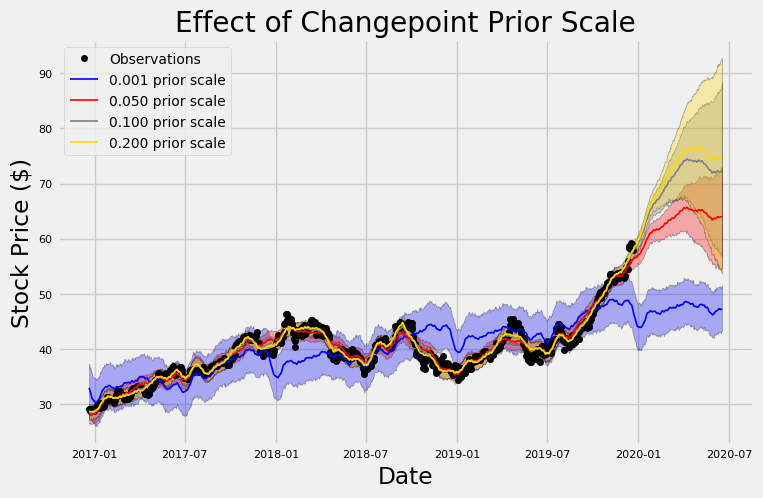

In [7]:
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])



Predicted Increase: 

          Date   estimate    change      upper      lower
2   2019-12-22  58.135279  0.343025  59.344444  56.830492
3   2019-12-23  58.371029  0.235749  59.641417  57.109224
4   2019-12-24  58.582199  0.211170  59.887186  57.356968
5   2019-12-25  58.709425  0.127226  59.976181  57.454420
6   2019-12-26  58.750239  0.040814  59.917842  57.484358
..         ...        ...       ...        ...        ...
95  2020-03-24  74.837708  0.241744  82.128631  67.674656
96  2020-03-25  75.020891  0.183183  82.490147  67.982106
97  2020-03-26  75.106549  0.085658  82.753818  67.826931
98  2020-03-27  75.127111  0.020561  82.659197  67.803596
100 2020-03-29  75.307432  0.180321  83.047312  67.809754

[85 rows x 5 columns]

Predicted Decrease: 

Empty DataFrame
Columns: [Date, estimate, change, upper, lower]
Index: []


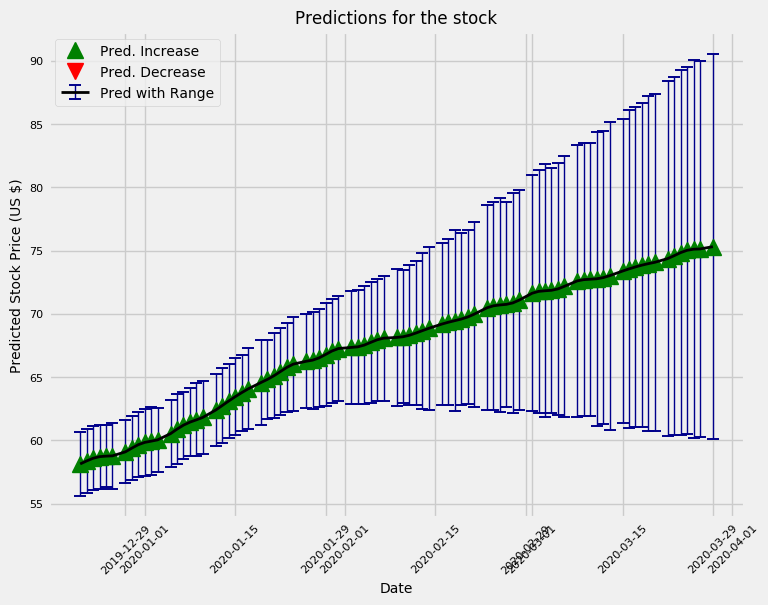

In [8]:
tsmc.predict_future(days=100)
